In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/synthetic_dataset.csv")
df = data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1614 non-null   object 
 1   Price     4188 non-null   float64
 2   Rating    2312 non-null   float64
 3   Stock     3010 non-null   object 
 4   Discount  3970 non-null   float64
dtypes: float64(3), object(2)
memory usage: 170.5+ KB


In [4]:
df.head()

,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,NaN,0.0
1,NaN,3045.0,4.757798,NaN,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,NaN,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0


In [5]:
df.tail()

,Category,Price,Rating,Stock,Discount
4357,NaN,4436.0,4.728335,NaN,49.0
4358,B,6236.0,NaN,Out of Stock,4.0
4359,NaN,3283.0,NaN,Out of Stock,9.0
4360,D,2999.0,4.425995,NaN,40.0
4361,NaN,NaN,2.184471,NaN,0.0


In [6]:
df.isnull().sum()

Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64

In [7]:
df.shape

(4362, 5)

In [8]:
c1 = df.select_dtypes("float") # Numerical column 

c2 = df.select_dtypes("object") # categorical column

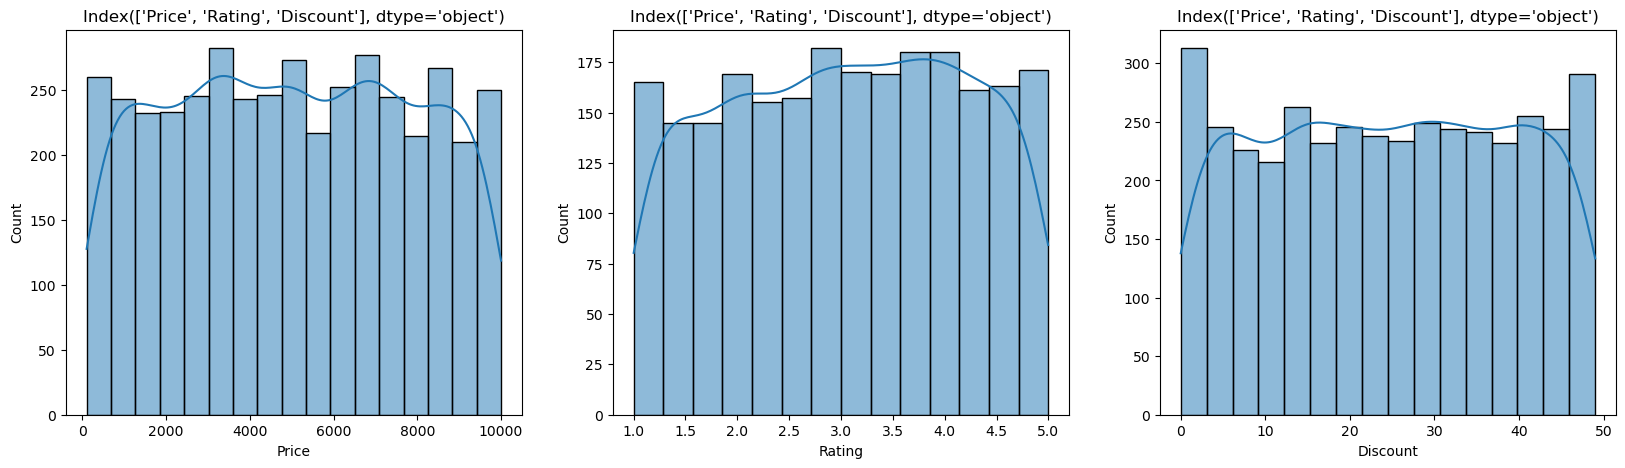

In [9]:
fig,axs = plt.subplots(1,3,figsize = (20,5))

for i in range(3):
    sns.histplot(data = df, x = c1.columns[i],kde = True, ax=axs[i])
    axs[i].set_title(c1.columns)

plt.show()

In [10]:
for i in c1:
    df[i] = df[i].fillna(df[i].median())

for j in c2:
    df[j] = df[j].fillna(df[j].mode()[0])

In [11]:
df.isnull().sum()

Category    0
Price       0
Rating      0
Stock       0
Discount    0
dtype: int64

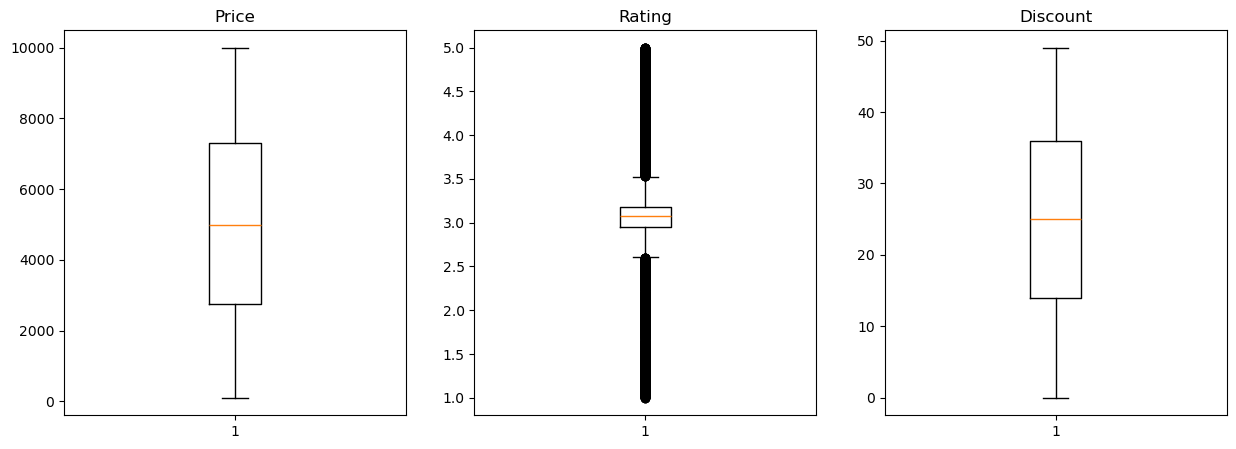

In [12]:
c3 = df.select_dtypes("float")
fig,axs  = plt.subplots(1,3,figsize=(15,5))

for i in range(3):
    axs[i].boxplot(df[c3.columns[i]])
    axs[i].set_title(c3.columns[i])

plt.show()


In [13]:
Q1 = np.percentile(df["Rating"],25,method= "midpoint")
Q3 = np.percentile(df["Rating"],75,method = "midpoint")

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outlier = df[(df["Rating"]> upper) | (df["Rating"]< lower)]

list1 = outlier["Rating"].tolist()

print(list1)

outlier.head()

[1.870322015500628, 4.757798057831803, 1.492084885301209, 3.668340748490816, 4.983998118378299, 4.626187280896929, 4.890749963096654, 1.2709427320459683, 4.097463656949772, 2.264050691550675, 2.264393100564309, 2.357527106379227, 1.8632245113185228, 3.8494948825094535, 3.95225743506134, 4.305789482267322, 1.9058024886644624, 4.789502194485456, 4.984170226351978, 4.45534399355245, 1.9243054921681804, 1.338253810015713, 4.951183214408314, 4.170806833653488, 1.865998304807294, 3.835636273769511, 4.464129272916702, 1.6573504366560314, 1.2279456432932538, 2.4937906347326475, 4.645463936808445, 4.036652101229622, 1.5983454005426196, 4.213202927733002, 4.976201301561568, 3.661720155583746, 2.581053762448872, 3.750973129417399, 4.282273713935922, 4.647670825820734, 4.589987920715608, 3.688162019635981, 2.530595786094526, 2.5677161236461608, 3.9136540296959086, 3.6193144852124495, 4.858685977036779, 4.874851836156545, 1.5320901750433862, 2.602243654999287, 1.168690444136142, 2.568984286425842, 

,Category,Price,Rating,Stock,Discount
0,C,5548.0,1.870322,In Stock,0.0
1,C,3045.0,4.757798,In Stock,38.0
3,C,4808.0,1.492085,In Stock,33.0
6,C,667.0,3.668341,In Stock,41.0
7,A,7125.0,4.983998,Out of Stock,7.0


In [14]:
df.drop(outlier.index, inplace = True)

In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
c5 = df.select_dtypes("object")

c5.nunique()

Category    4
Stock       2
dtype: int64

In [17]:
df = pd.get_dummies(df, dtype=int,drop_first= True)

df

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
0,4004.0,3.082060,0.0,0,1,0,0
1,1817.0,3.082060,23.0,0,1,0,1
2,3522.0,3.082060,25.0,0,1,0,0
3,2777.0,2.678384,6.0,0,0,0,0
4,1151.0,2.947838,25.0,0,0,0,0
...,...,...,...,...,...,...,...
2595,5788.0,3.082060,11.0,0,1,0,0
2596,4996.5,3.082060,46.0,0,1,0,0
2597,4996.5,3.082060,21.0,0,1,0,1
2598,6236.0,3.082060,4.0,1,0,0,1


In [18]:
mm = MinMaxScaler()

c6 = ["Rating","Rating"]

df[c6] = mm.fit_transform(df[c6])

In [19]:
df.describe()

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,4958.419808,0.514305,24.753462,0.085385,0.730000,0.089231,0.342692
std,2751.231823,0.130115,13.443524,0.279507,0.444045,0.285131,0.474701
min,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2714.250000,0.518758,14.000000,0.000000,0.000000,0.000000,0.000000
50%,4996.500000,0.518758,25.000000,0.000000,1.000000,0.000000,0.000000
75%,7241.000000,0.518758,35.000000,0.000000,1.000000,0.000000,1.000000
max,9997.000000,1.000000,49.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
x = df.drop("Price",axis=1)
y = df[["Price"]]

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state= 42)

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [23]:
model = lr.fit(x_train,y_train)

In [24]:
y_predict = model.predict(x_test)

In [25]:
y_predict

array([[5080.76352848],
       [4971.02267635],
       [5038.01000779],
       [4879.91951226],
       [4855.91704374],
       [5047.87620487],
       [4971.02267635],
       [4696.58299884],
       [4998.54521947],
       [4998.54521947],
       [5091.73978274],
       [4931.55788803],
       [4961.42089782],
       [5001.83395183],
       [5050.05808589],
       [5124.34315036],
       [5105.20397523],
       [4685.50411752],
       [5097.20719028],
       [4742.75696912],
       [4771.14287613],
       [5024.85507835],
       [4864.19952132],
       [4952.50296643],
       [5010.48746468],
       [4752.49144896],
       [5031.43254307],
       [4859.2057761 ],
       [4975.52409295],
       [5057.74240196],
       [4583.18266923],
       [5038.11687229],
       [4620.94215455],
       [5080.76352848],
       [5176.62373844],
       [5291.48192434],
       [5008.41141655],
       [4938.13535275],
       [4553.95482311],
       [4998.54521947],
       [5064.31986668],
       [4965.657

In [26]:
y_test

,Price
1593,6922.0
196,4996.5
239,7897.0
2126,1561.0
1587,347.0
...,...
662,1511.0
1578,4678.0
2057,6045.0
798,6244.0


In [27]:
from sklearn.metrics import r2_score

print(f"r2score = {r2_score(y_test,y_predict)}")

r2score = 0.002078205517836107
